---
# **LA LOI DU CROUS :**
## *Étude des déterminations du prix des résidences universitaires Crous et de leurs répartitions dans les départements*
---

# Introduction:

350 000 étudiants habitent dans une résidence des centres régionaux des œuvres universitaires et scolaires (Crous), soit seulement 10% des 2 millions d'étudiants vivant hors de leurs domiciles, selon un  rapport sur le logement et la précarité des étudiants, des apprentis et des jeunes actifs de l'Assemblée nationale datant de janvier 2022 [1]. Selon ce même rapport, le logement est le premier poste de dépense des étudiants soit 60% de leurs revenus. Il est donc primordiale de donner accès à un logement abordable aux étudiants qui sont de plus en plus précaires de manières équitables selon les départements où ils se trouvent. 

Partant de ces constats, nous nous sommes posés plusieurs questions : le loyer est-il le même pour un logement situé dans un marché immobilier en tension comme Paris que dans un marché qu'il l'est moins comme Dijon ? Ou au contraire, est-ce que les prix sont globalement uniformes ? De même, est-ce que la concentration importante d'étudiants scolarisés à proximité de la résidence influe le prix vers la hausse? 

De ce fait, nous chercherons donc à répondre à la problématique suivante : 

***Les loyers des résidences des Crous suivent-ils la loi de l'offre et de la demande ?***

**Modèle :**

Ainsi, nous proposons d'étudier dans ce rapport, d'une part la répartition des 795 résidences des Crous sur le territoire; et d'autre part, les déterminants du prix du loyer de celles-ci pour pouvoir montrer d'éventuelles variations entre les départements. Pour expliquer le loyer nous utiliserons un modèle d'offre et de demande économique élèmentaire. Dans celui-ci, la résidence offre des biens de surfaces variables q à un prix p en mètre carré, et fait face à une concurrence représenté par le montant des loyers dans le parc privé. La demande sera représentée par l'effectifs d'étudiants scolarisés dans une école se situant dans un rayon de 20km de la résidence. Nous faisons l'hypothèse que les résidences proposent à peu près les mêmes caractéristiques entre elles et que les étudiants sont des price-takers. 

Nous réaliserons ainsi des régressions linéaires classiques : 

\begin{equation}
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i + \hat{\epsilon}_i
\end{equation}

**PLAN:**

1. Dans une première partie, nous réccupérons une base de données avec les loyers (maximum, minimum et moyen), les surfaces (idem), les coordonnées géographiques, les loyers privés dans la ville de la résidence et l'effectif des étudiants dans un périmètre de 20 kilomètres. 

2. Dans une deuxième partie, nous analyserons d'une part la répartition des résidences en France et, d'autre part, nous réaliserons des statistiques descriptives sur les différentes variables de notre base de données. 

3. Dernièrement, nous utiliserons des modèles de régressions linéaires pour répondre à notre problématique. 


## Les données utilisées 

Nous nous servirons de plusieures base de données : 

1. **Ensemble des logements proposés aux étudiants par le réseau des CROUS :** 

Données mises à disposition par le Centre National des Œuvres Universitaires et Scolaires (CNOUS). Ils ont été publiés en 2017 et sont mises à jour assez régulièrement. Le problème principale de cette base de données est la récupération des loyers et des surfaces qui sont stockés dans une colonne nommée "infos" (s'il y en a). De plus, chaque colonne a été remplie par les résidences. La qualité et la structure des informations sont donc très variables. Nous avons donc mis en place des techniques de traitements textuels ou de natural language processing (NPL).

https://www.data.gouv.fr/fr/datasets/ensemble-des-logements-proposes-aux-etudiants-par-le-reseau-des-crous/

2. **"Carte des loyers" - Indicateurs de loyers d'annonce par commune en 2018**

Données obtenues par une collaboration entre la Direction Générale de l’Aménagement, du Logement et de la Nature (DGALN), une équipe de recherche en économie d’Agrosup Dijon, de l’Institut national de la recherche en agronomique (INRAE), de SeLoger, de leboncoin et de PAP. Ces équipes ont créé différents indicateurs par communes à partir de 9 millions d'annonces. Les données datent de 2018 et nous nous servirons uniquement de données pour les appartements.

https://www.data.gouv.fr/fr/datasets/carte-des-loyers-indicateurs-de-loyers-dannonce-par-commune-en-2018/


3. **Statistiques sur les effectifs d'étudiants inscrits par établissement public sous tutelle du ministère en charge de l'Enseignement supérieur (avec doubles inscriptions CPGE)**

"Ce jeu de données propose un ensemble de statistiques sur les effectifs d'étudiants inscrits de 2006-07 à 2021-22 par établissement public sous tutelle du ministère en charge de l'Enseignement supérieur français : universités, universités de technologie, grands établissements, COMUE, écoles normales supérieures, écoles centrales, INSA, autres écoles d'ingénieurs..."

https://www.data.gouv.fr/fr/datasets/statistiques-sur-les-effectifs-detudiants-inscrits-par-etablissement-public-sous-tutelle-du-ministere-en-charge-de-lenseignement-superieur-avec-doubles-inscriptions-cpge/

4. **Contours Communes France Administrative "Format Admin-Express" avec arrondissements**

Jeu de données de l'IGN regroupant les contours communales avec arrondissements.

https://www.data.gouv.fr/fr/datasets/contours-communes-france-administrative-format-admin-express-avec-arrondissements/

5. **Contours des départements français issus d'OpenStreetMap**

Jeu de données d'OpenStreetMap regroupant les contours géographiques des départements. 

https://www.data.gouv.fr/fr/datasets/contours-des-departements-francais-issus-d-openstreetmap/





# Librairies nécessaires

In [1]:
%%capture 
#hide output 
!pip install geoplot
!pip install contextily
!pip install altair

In [2]:
import pandas as pd 
import geopandas as gpd 
import nltk
nltk.download('punkt')
import contextily as ctx
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import folium
import numpy as np
import seaborn as sns
import altair as alt 

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


# Partie I : Obtention du dataframe 

L'objectif de cette partie est de créer une base de données contenant pour chaque résidence : 
- Le prix du loyer (maximum, minimum et moyen);
- La surface (idem);
- Les coordonnées géographiques compatibles avec Géopanda (nécessaires pour réccupèrer le nombre d'étudiants et les cartes);
- L'indicateur du loyer privé maximum d'un appartement dans la ville de la résidence;
- Le nombre d'étudiants scolarisés dans un rayon de 20 km autour de la résidence hors CPGE

Le principale problème de cette base de données est le fait que d'une part, il n'existe pas de colonne contenant exlicitement le loyer et les surfaces, et d'autre part, chaque résidence a remplie à sa manière les informations sur les loyers et les surfaces (s'ils ont rempli). Nous avons donc mis en place des fonctions de Natural Language Processing (NLP) pour pouvoir les réccupèrer (pour plus d'informations voire le document : functions_for_data_cleaning.py) 

## I.1. Récupération des loyers, des surfaces et de la localisation des résidences

In [3]:
"""
Importation des données.
"""
df = pd.read_csv("https://data.enseignementsup-recherche.gouv.fr//explore/dataset/fr_crous_logement_france_entiere/download?format=csv&timezone=Europe/Berlin&use_labels_for_header=false", 
                 sep =';')

In [4]:
"""
Réduction de notre base de données aux 5 colonnes qui nous intéressent (nom de la résidence ou "title";
la colonne comportant toutes les infos sur les surfaces et les loyers ; l'adresse; les coordonnées géographiques; 
et les noms des régions.
"""
df = df[["title", "infos", "address" ,"geocalisation", "regions"]]

In [5]:
from functions_for_data_cleaning import * #document .py comportant nos fonctions nécessaires au nettoyage

df = get_loyer(df) #récuppération des loyers à partir de la colonne "infos"
df = get_surface(df) #récuppération des surfaces à partir de la colonne "infos"
df = get_localisation(df) #récuppération des coordonnées géographiques à partir de la colonne "geocalisation"

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## I.2. Récupération des loyers privés des communes (avec la géolocalisation des communes)

Le but de cette partie est de joindre la base précédemment obtenue avec la base des indicateurs des loyers privés maximum pour un appartement et par communes (var : upr.lPm2)

In [6]:
df_private = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/8fac6fb7-cd07-4747-8e0b-b101c476f0da", encoding= 'unicode_escape', sep = ";")

On ne garde que le code INSEE, le nom de la ville et le loyer supérieur par m^2


In [7]:
df_private = df_private[["INSEE", "LIBGEO","upr.IPm2"]]

On renomme la colonne INSEE en codgeo pour pouvoir la merger avec la carte des contours des villes.

In [8]:
df_private.rename(columns = {'INSEE':'codgeo',"upr.IPm2" : "Loyer_prive_m2" }, inplace = True)

In [9]:
"""
On rajoute un 0 devant le code INSEE quand il ne fait que quatre chiffres (pour uniformiser avec l'autre base).
"""
df_private["codgeo"] = df_private["codgeo"].apply(lambda x : "0" + x if len(x) == 4 else x)

"""
On transforme en float le loyer privé 
"""
df_private["Loyer_prive_m2"] = df_private["Loyer_prive_m2"].apply(lambda x : x.replace(',','.')) 
df_private["Loyer_prive_m2"] = df_private["Loyer_prive_m2"].astype(float)

In [10]:
df_private = df_private.set_index('codgeo') #on réindex le dataframe avec le code INSEE pour merger après. 

On récuppère les contours géographique des communes pour pouvoir faire la jointure avec notre base.(prends du temps)

In [11]:
gdf_communes_boundaries = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/e9391593-fa95-4153-aabe-87ca84d197e9")

On ne garde que le code INSEE et les données polygoniales. 

In [12]:
gdf_communes_boundaries.rename(columns = {'INSEE_COM':'codgeo'}, inplace = True)
gdf_communes_boundaries = gdf_communes_boundaries[["codgeo", "geometry"]]
gdf_communes_boundaries = gdf_communes_boundaries.set_index('codgeo')


On concatène les deux datafarmes

In [13]:
gdf_private = pd.concat([df_private,gdf_communes_boundaries], axis = 1, join = "inner")

## I.3. Jointures spatiales

Maintenant que nous avons une base des loyers privés avec les coordonnées des communes nous allons pouvoir réaliser une jointure spatiale avec la base des résidences.

In [14]:

#gdf_private['geometry'] = gdf_private['geometry'].apply(wkt.loads) #on transforme en format wkt (sinon ça ne marche pas)
gdf_private = gpd.GeoDataFrame(gdf_private)  #on transforme en geodataframe 
df = gpd.sjoin(df, gdf_private, how='left', op='within') #on réalise la jointure à gauche avec within 
#i.e si le point est dans le polynôme. 

/opt/mamba/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_806/2580680376.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df = gpd.sjoin(df, gdf_private, how='left', op='within') #on réalise la jointure à gauche avec within


In [15]:
del df['index_right'] #on supprime l'index right pour la prochaine jointure

## I.4 Ajout des départements 

Pour pouvoir avoir des comparaisons par départements nous allons réccupèrer les départements et les joindre avec nos bases grâce à une jointure spatiale. 

In [16]:
gdf_dep = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/eb36371a-761d-44a8-93ec-3d728bec17ce")
gdf_dep.rename(columns = {'nom':'departement'}, inplace = True)
gdf_dep = gdf_dep[["departement", "geometry", "code_insee"]]

In [17]:
df = gpd.sjoin(df, gdf_dep, how='left', op='within')
del df['index_right'] #on supprime l'index right pour la prochaine jointure

/opt/mamba/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_806/3363061827.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df = gpd.sjoin(df, gdf_dep, how='left', op='within')


In [18]:
gdf_dep

,departement,geometry,code_insee
0,La Réunion,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -...",974
1,Aude,"POLYGON ((1.68872 43.27368, 1.69001 43.27423, ...",11
2,Haute-Loire,"POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...",43
3,Bouches-du-Rhône,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",13
4,Lot-et-Garonne,"POLYGON ((-0.14058 44.22648, -0.12931 44.23218...",47
...,...,...,...
97,Morbihan,"MULTIPOLYGON (((-3.73508 48.11140, -3.73507 48...",56
98,Doubs,"POLYGON ((5.69876 47.26464, 5.69877 47.26481, ...",25
99,Jura,"MULTIPOLYGON (((5.25202 46.94451, 5.25208 46.9...",39
100,Ardèche,"POLYGON ((3.86110 44.71118, 3.86110 44.71151, ...",07


## I.5. Association de résidences à une école 

Import de notre base de données des écoles pour pouvoir réccupèrer le nombre d'étudiants scolarisés dans un rayon de 20km.

In [19]:
df_schools = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/0c713161-26fb-415e-ac1d-8769125f338d", sep = ";")

In [20]:
df_schools

,attention,annee_universitaire,etablissement_type,etablissement_typologie,etablissement_id_paysage,etablissement_lib,etablissement_id_wikidata,etablissement_id_ror,etablissement_id_uai,etablissement_localisation,...,etablissement_id_departement,etablissement_departement,etablissement_id_uucr,etablissement_uucr,etablissement_code_commune,etablissement_commune,etablissement_id_paysage_actuel,etablissement_actuel_lib,rentree,annee
0,Sans double compte des établissements-composan...,2006-07,Université,Université pluridisciplinaire avec santé,06SE7,Université de Bretagne Occidentale,Q1857334,01b8h3982,0290346U,Bretagne>Rennes>Finistère>Brest,...,D029,Finistère,UU29701,Brest,29019,Brest,06SE7,Université de Bretagne Occidentale,2006,2007
1,Sans double compte des établissements-composan...,2006-07,Université,Université tertiaire - droit et économie,542Id,Université Toulouse Capitole,Q590201,0443n9e75,0311382J,Occitanie>Toulouse>Haute-Garonne>Toulouse,...,D031,Haute-Garonne,UU00758,Toulouse,31555,Toulouse,542Id,Université Toulouse Capitole,2006,2007
2,Sans double compte des établissements-composan...,2006-07,Autre établissement,NaN,5y7lF,Institut universitaire de formation des maître...,NaN,NaN,9730224F,Guyane>Cayenne,...,D973,Guyane,UU9C601,Cayenne,97302,Cayenne,hy4EW,Université de Guyane,2006,2007
3,Sans double compte des établissements-composan...,2006-07,Université,Université pluridisciplinaire avec santé,7hB8r,Université de Nantes,Q259388,03gnr7b55,0440984F,Pays de la Loire>Nantes>Loire-Atlantique>Nantes,...,D044,Loire-Atlantique,UU44701,Nantes,44109,Nantes,qUCQp,Nantes Université,2006,2007
4,Sans double compte des établissements-composan...,2006-07,École,NaN,8618D,École normale supérieure PSL,Q83259,05a0dhs15,0753455Y,Île-de-France>Paris>Paris 5e,...,D075,Paris,UU00851,Paris,75105,Paris 5e,8618D,École normale supérieure PSL,2006,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,Sans double compte des établissements-composan...,2021-22,École,NaN,tdEpy,École nationale supérieure de l'électronique e...,Q2707341,03qeacd72,0951376E,Île-de-France>Versailles>Val-d'Oise>Paris>Cergy,...,D095,Val-d'Oise,UU00851,Paris,95127,Cergy,tdEpy,École nationale supérieure de l'électronique e...,2021,2022
2284,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,vb71K,Université Paris-Est Créteil,Q980688,05ggc9x40,0941111X,Île-de-France>Créteil>Val-de-Marne>Paris>Créteil,...,D094,Val-de-Marne,UU00851,Paris,94028,Créteil,vb71K,Université Paris-Est Créteil,2021,2022
2285,Sans double compte des établissements-composan...,2021-22,Université,Université pluridisciplinaire avec santé,xJdyB,Aix-Marseille Université,Q2302586,035xkbk20,0134009M,Provence-Alpes-Côte d'Azur>Aix-Marseille>Bouch...,...,D013,Bouches-du-Rhône,UU00759,Marseille-Aix-en-Provence,13207,Marseille 7e,xJdyB,Aix-Marseille Université,2021,2022
2286,Sans double compte des établissements-composan...,2021-22,École,NaN,zHvr4,École nationale supérieure des arts et techniq...,Q3578242,NaN,0693735K,Auvergne-Rhône-Alpes>Lyon>Rhône>Lyon>Lyon 5e,...,D069,Rhône,UU00760,Lyon,69385,Lyon 5e,zHvr4,École nationale supérieure des arts et techniq...,2021,2022


In [21]:
df_schools = df_schools[df_schools["annee_universitaire"] == "2021-22" ] #on ne prend que l'année 2021-22
df_schools = df_schools[["etablissement_lib", "effectif_sans_cpge", "etablissement_code_commune", "etablissement_commune",  "etablissement_departement"]]
df_schools.rename(columns = {'etablissement_code_commune':'codgeo'}, inplace = True) #On renomme la colonne pour la jointure

On enlève les valeurs manquantes (il manque des coordonnées pour certains établissments).

In [22]:
index_with_nan = df_schools.index[df_schools.isnull().any(axis=1)]
df_schools.drop(index_with_nan,0, inplace=True) 
df_schools.set_index('codgeo', inplace = True) #on recommence l'index

/tmp/ipykernel_806/2476089590.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_schools.drop(index_with_nan,0, inplace=True)


Jointure avec les coordonnées géographiques des communes pour pouvoir trouver dans un rayon de 20km les écoles autour des résidences.

In [23]:
df_schools = df_schools.join(gdf_communes_boundaries)
df_schools = gpd.GeoDataFrame(df_schools)
df_schools.crs = "epsg:4326"

On applique la fonction get_nb_student disponible dans le fichier function_for_data_cleaning.py qui permet d'obtenir le nombre d'étudiants dans un rayon de 20km autour de nos résidences.

In [24]:
df.crs = "epsg:4326" #on définit la projection de notre dataframe
df = get_nb_student(df, df_schools, 20)

## I.6. Obtention de la base de données finale

In [25]:
df 

,title,infos,address,geocalisation,regions,Loyer,Max Loyer,Min Loyer,Mean Loyer,Surface,...,Mean Surface,Longitude,Latitude,geometry,LIBGEO,Loyer_prive_m2,departement,code_insee,Schools,Nbstudents
0,Cité U' La Bourgeonnière,Localisation\n\r\n Tramway Ligne 2 (arrêt Bour...,"5, Rue des Renards, 44322 Nantes","47.2536315918,-1.5635741949",Pays de la Loire,"[164.95, 254.8, 346.8, 378.8]",378.80,164.95,286.337500,"[9.0, 9.0, 13.0, 18.0, 9.0, 9.0, 13.0, 18.0]",...,12.25,-1.563574,47.253632,POINT (-1.56357 47.25363),Nantes,15.326286,Loire-Atlantique,44,[Nantes Université],44394
1,Résidence U' Les Saumonières,Localisation\n\r\n Tramway Ligne 2 (arrêt Rect...,"14, Rue des Saumonières, 44300 Nantes","47.2551040649,-1.5516899824",Pays de la Loire,[361.46],361.46,361.46,361.460000,"[17.0, 19.0]",...,18.00,-1.551690,47.255104,POINT (-1.55169 47.25510),Nantes,15.326286,Loire-Atlantique,44,[Nantes Université],44394
2,Résidence U' Corbilo,Localisation\n\r\n Tram 2-3 (arrêt Mangin)Bus ...,"18, rue Anatole de Monzie, 44200 Nantes","47.2025222778,-1.5433219671",Pays de la Loire,"[343.79, 407.43, 558.75]",558.75,343.79,436.656667,"[20.0, 30.0, 30.0, 35.0, 20.0, 30.0]",...,27.50,-1.543322,47.202522,POINT (-1.54332 47.20252),Nantes,15.326286,Loire-Atlantique,44,[Nantes Université],44394
3,Résidence U' Ile de Nantes,Localisation\n\r\n Bus C5 et 26 (arrêt Républi...,"23, Bd de la Prairie au Duc, 4200 Nantes","47.2048683167,-1.5581860542",Pays de la Loire,"[338.21, 358.71]",358.71,338.21,348.460000,"[18.0, 27.0, 18.0, 27.0]",...,22.50,-1.558186,47.204868,POINT (-1.55819 47.20487),Nantes,15.326286,Loire-Atlantique,44,[Nantes Université],44394
4,Résidence U' Longchamp,Localisation\n\r\n Tramway 3 (arrêt Longchamp)...,"79, Rue de la Gaudinière, 44300 Nantes","47.2384872437,-1.5774370432",Pays de la Loire,"[309.15, 326.23, 360.49]",360.49,309.15,331.956667,"[18.0, 28.0, 18.0, 22.0, 28.0]",...,22.80,-1.577437,47.238487,POINT (-1.57744 47.23849),Nantes,15.326286,Loire-Atlantique,44,[Nantes Université],44394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,Résidence Les Aunettes,Description Résidence universitaire située prè...,1 impasse de Prédecelle 91000 Evry,"48.617641449,2.4339873791",Île-de-France,[260.0],260.00,260.00,260.000000,[],...,NaN,2.433987,48.617641,POINT (2.43399 48.61764),Évry,19.902736,Essonne,91,"[Université d'Évry-Val-d'Essonne, École nation...",7475
791,Résidence Olympe de Gouges,Description Résidence de la réussite* située a...,31 avenue Lombard 92260 Fontenay-aux-Roses,"48.7897758484,2.2871809006",Île-de-France,"[272.0, 537.0]",537.00,272.00,404.500000,"[16.0, 25.0]",...,20.50,2.287181,48.789776,POINT (2.28718 48.78978),Fontenay-aux-Roses,23.112032,Hauts-de-Seine,92,"[Université Paris Lumières, Université Paris 1...",236441
792,Résidence Adrienne Bolland,Description Résidence universitaire située dan...,1526 rue Blériot 78530 Buc,"48.780872345,2.1315436363",Île-de-France,"[346.0, 530.0]",530.00,346.00,438.000000,[],...,NaN,2.131544,48.780872,POINT (2.13154 48.78087),Buc,22.417329,Yvelines,78,[Université de Versailles Saint-Quentin-en-Yve...,63178
793,Résidence Jacqueline Auriol,Description Résidence universitaire située en ...,64 avenue Gaston Boissier 78220 Viroflay,"48.8005752563,2.1810252666",Île-de-France,"[355.0, 537.0]",537.00,355.00,446.000000,"[18.1, 24.8]",...,21.45,2.181025,48.800575,POINT (2.18103 48.80058),Viroflay,24.311207,Yvelines,78,"[Sciences Po, Université de Versailles Saint-Q...",74156


# Part II : Visualisation 

## II.0 Construction d'indicateurs 

Construction d'indicateurs des loyers par surfaces ('prix_par_m2_surf_min' en référence aux studios et 'prix_par_m2_surf_max' en référence aux (grands) studios/colocation)

In [26]:
df['prix_par_m2_surf_min'] = df['Min Loyer']/df['Min Surface'] 
df['prix_par_m2_surf_max'] = df['Max Loyer']/df['Max Surface'] 

Construction d'un indicateur du nb de Crous par nb d'étudiants par départements qui sera ensuite afficher sur une carte. Cela va créer un ratio en pourcentage.  

In [27]:
Nb_residence_par_dep = df.reset_index().groupby('departement')['index'].nunique() #on reindex le dataframe
#de 0 à n-1 puis on compte le nombre d'index unique par département pour avoir le nombre de résidences par départements
Nb_residence_par_dep = pd.DataFrame(Nb_residence_par_dep) #on transforme en dataframe 
nb_eleve_dep = df_schools.groupby('etablissement_departement').sum()['effectif_sans_cpge'] #on somme par département le nb
#le nombre d'étudiants
nb_eleve_dep = pd.DataFrame(nb_eleve_dep) #on transforme en dataframe pour la jointure
nb_residence_par_eleves = Nb_residence_par_dep.join(nb_eleve_dep, how = 'inner') #on joint nos deux dataframe
nb_residence_par_eleves = nb_residence_par_eleves.assign(Nb_by_students=lambda x: (x["index"]/x["effectif_sans_cpge"])*100)
#On crée notre ratio du nb de résidences/élèves/dép 
nb_residence_par_eleves = nb_residence_par_eleves.join(gdf_dep.set_index("departement"))
#on rajoute les coordonnées géographiques des départements (pour les cartes) 
nb_residence_par_eleves.reset_index(inplace = True)
#on reset index 
del nb_residence_par_eleves["geometry"]
#on supprime la colonne geometry par simplicité par la suite 
nb_residence_par_eleves

/tmp/ipykernel_806/187469802.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nb_eleve_dep = df_schools.groupby('etablissement_departement').sum()['effectif_sans_cpge'] #on somme par département le nb


,level_0,index,effectif_sans_cpge,Nb_by_students,code_insee
0,Alpes-Maritimes,15,33537,0.044727,06
1,Aube,3,3235,0.092736,10
2,Bas-Rhin,13,56593,0.022971,67
3,Bouches-du-Rhône,30,74558,0.040237,13
4,Calvados,8,32933,0.024292,14
5,Charente-Maritime,6,8193,0.073233,17
6,Cher,4,1705,0.234604,18
7,Côte-d'Or,9,31341,0.028716,21
8,Doubs,6,26434,0.022698,25
9,Essonne,13,56070,0.023185,91


Dataframe avec les 10 départements avec le plus d'étudiants

In [44]:
nb_eleve_dep_top_10 = nb_eleve_dep.sort_values(by='effectif_sans_cpge', ascending=False) 
nb_eleve_dep_top_10

,effectif_sans_cpge
etablissement_departement,
Paris,236136
Rhône,110738
Nord,106498
Haute-Garonne,90158
Bouches-du-Rhône,74558
Gironde,71675
Hérault,69980
Meurthe-et-Moselle,64943
Isère,57964


Construction d'un ratio pour enlever les départements avec un nombre de valeurs importantes (surfaces ou loyers) trop important 

In [29]:
df_ratio_min = df
df_ratio_min['prix_par_m2_surf_min_null'] = df.prix_par_m2_surf_min.isnull() # On compte le nombre de valeurs manquantes par ligne
df_ratio_min['prix_par_m2_surf_min_null'] = df_ratio_min['prix_par_m2_surf_min_null'].astype(int) # on transforme le booléen en valeur 0 ou 1 df_ratio_min
df_ratio_min = df_ratio_min.groupby(['departement'], as_index=False)['prix_par_m2_surf_min_null'].sum() # On additionne par département le nombre de résidences avec des valeurs manquantes
df_ratio_min = pd.merge(df_ratio_min, Nb_residence_par_dep, how="inner", on=[Nb_residence_par_dep.index, "departement"])
df_ratio_min = df_ratio_min.rename(columns={'index': 'Nb_res_dep'})
df_ratio_min['ratio'] = df_ratio_min['prix_par_m2_surf_min_null']/df_ratio_min['Nb_res_dep']
df_ratio_min = df_ratio_min[df_ratio_min['ratio']<0.5]    # On enlève les départements dont plus de 50 % des résidences présentent des valeurs manquantes 
df_ratio_min

df_dep_ratio = pd.merge(df_ratio_min, df , how="left", on=["departement", "departement"])
df_dep_ratio 

,key_0,departement,prix_par_m2_surf_min_null_x,Nb_res_dep,ratio,title,infos,address,geocalisation,regions,...,Latitude,geometry,LIBGEO,Loyer_prive_m2,code_insee,Schools,Nbstudents,prix_par_m2_surf_min,prix_par_m2_surf_max,prix_par_m2_surf_min_null_y
0,Aisne,Aisne,0,2,0.000000,Résidence du Nain d'Alsace,Localisation\r\n A proximité du centre ville \...,Rue Quentin Barre 02100 Saint-Quentin,"49.8493385315,3.3014810085",Hauts-de-France,...,49.849339,POINT (3.30148 49.84934),Saint-Quentin,11.992983,02,[],0,18.360690,16.044615,0
1,Aisne,Aisne,0,2,0.000000,Résidence les Béguinages,Localisation \r\n A proximité de l'IUT et de l...,23 rue des Béguinages 02100 Saint-Quentin,"49.8344955444,3.3043131828",Hauts-de-France,...,49.834496,POINT (3.30431 49.83450),Saint-Quentin,11.992983,02,[],0,13.146875,11.180365,0
2,Allier,Allier,0,1,0.000000,Résidence MONTLUÇON,Cette résidence constituée de 114 chambres rén...,Allée Jean-Jacques-Soulier - BP 409 03107 Mont...,"46.3292694092,2.5880711079",Auvergne-Rhône-Alpes,...,46.329269,POINT (2.58807 46.32927),Montluçon,10.386274,03,[],0,22.020000,16.666667,0
3,Alpes-Maritimes,Alpes-Maritimes,1,15,0.066667,Isaac Newton,Type de résidence : conventionnée Année de con...,2400 route des Dolines 06560 Valbonne,"43.6256904602,7.0512738228",Provence-Alpes-Côte d'Azur,...,43.625690,POINT (7.05127 43.62569),Valbonne,22.225052,06,[],0,16.347619,17.845238,0
4,Alpes-Maritimes,Alpes-Maritimes,1,15,0.066667,Olivier Chesneau,Type de résidence : conventionnéeAnnée de cons...,22 route de Turin 06300 Nice,"43.710424,7.284853",Provence-Alpes-Côte d'Azur,...,43.710424,POINT (7.28485 43.71042),Nice,22.582842,06,[Université Côte d'Azur],33537,16.250000,16.250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Yvelines,Yvelines,3,7,0.428571,Résidence Jacqueline de Romilly,Description Résidence universitaire donnant su...,NaN,"48.8187904358,2.1487836838",Île-de-France,...,48.818790,POINT (2.14878 48.81879),Versailles,28.519253,78,[Université de Versailles Saint-Quentin-en-Yve...,95576,33.562500,19.955407,0
398,Yvelines,Yvelines,3,7,0.428571,Résidence Vauban,Description La résidence est située au cœur de...,1 boulevard d’Alembert 78280 Guyancourt,"48.7796516418,2.0441513062",Île-de-France,...,48.779652,POINT (2.04415 48.77965),Guyancourt,21.738423,78,[Université de Versailles Saint-Quentin-en-Yve...,63178,NaN,NaN,1
399,Yvelines,Yvelines,3,7,0.428571,Résidence La Fresque,Description Résidence universitaire située aux...,10 rue Edmé Bouchardon 78000 Versailles,"48.8112220764,2.1460649967",Île-de-France,...,48.811222,POINT (2.14606 48.81122),Versailles,28.519253,78,[Université de Versailles Saint-Quentin-en-Yve...,63483,24.941176,21.225296,0
400,Yvelines,Yvelines,3,7,0.428571,Résidence Adrienne Bolland,Description Résidence universitaire située dan...,1526 rue Blériot 78530 Buc,"48.780872345,2.1315436363",Île-de-France,...,48.780872,POINT (2.13154 48.78087),Buc,22.417329,78,[Université de Versailles Saint-Quentin-en-Yve...,63178,NaN,NaN,1


## II.1. Où se situe les Crous ? 

### II.1.A. Carte interactive des informations pratiques sur les CRous

In [30]:
map = folium.Map(location=[48.7144587, 2.2453842], tiles="OpenStreetMap", zoom_start=11)

# Create a geometry list from the GeoDataFrame

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in df.geometry] 


# Iterate through list and add a marker for each residence, color-coded by its type.

i = 0

for coordinates in geo_df_list:

    # Place the markers with the popup labels and data

    map.add_child(

        folium.Marker(

            location=coordinates,

            popup=

                 "Name: " + str(df.title[i]) + "<br>"

                + "Moyenne Loyer: " + str(df["Mean Loyer"][i]) + "<br>"

                + "Moyenne surface: " + str(df["Mean Surface"][i]) + "<br>"

                + "Address: " + str(df.address[i]) + "<br>"

                + "Coordinates: " + str(geo_df_list[i])

            ,

        

            icon=folium.Icon(color="blue"),

        )

    )

    i = i + 1

map

### II.1.B. Répartition des Crous en fonction du nombre d'étudiants par départements

In [31]:
# Load the json file with departement coordinates
geoData = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")
geoData.index = geoData.index.astype(str).astype(int)
fullData = geoData.merge(nb_residence_par_eleves,left_on=['code'], right_on=['code_insee'])
#Obtain dataframe with data + coordonate (more easy to manipulate) 

In [32]:
"""
On récupère un fond de carte de la France.
"""

France = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")

/opt/mamba/lib/python3.10/site-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.5, 1.0, 'Number of residence by students by departements in percent')

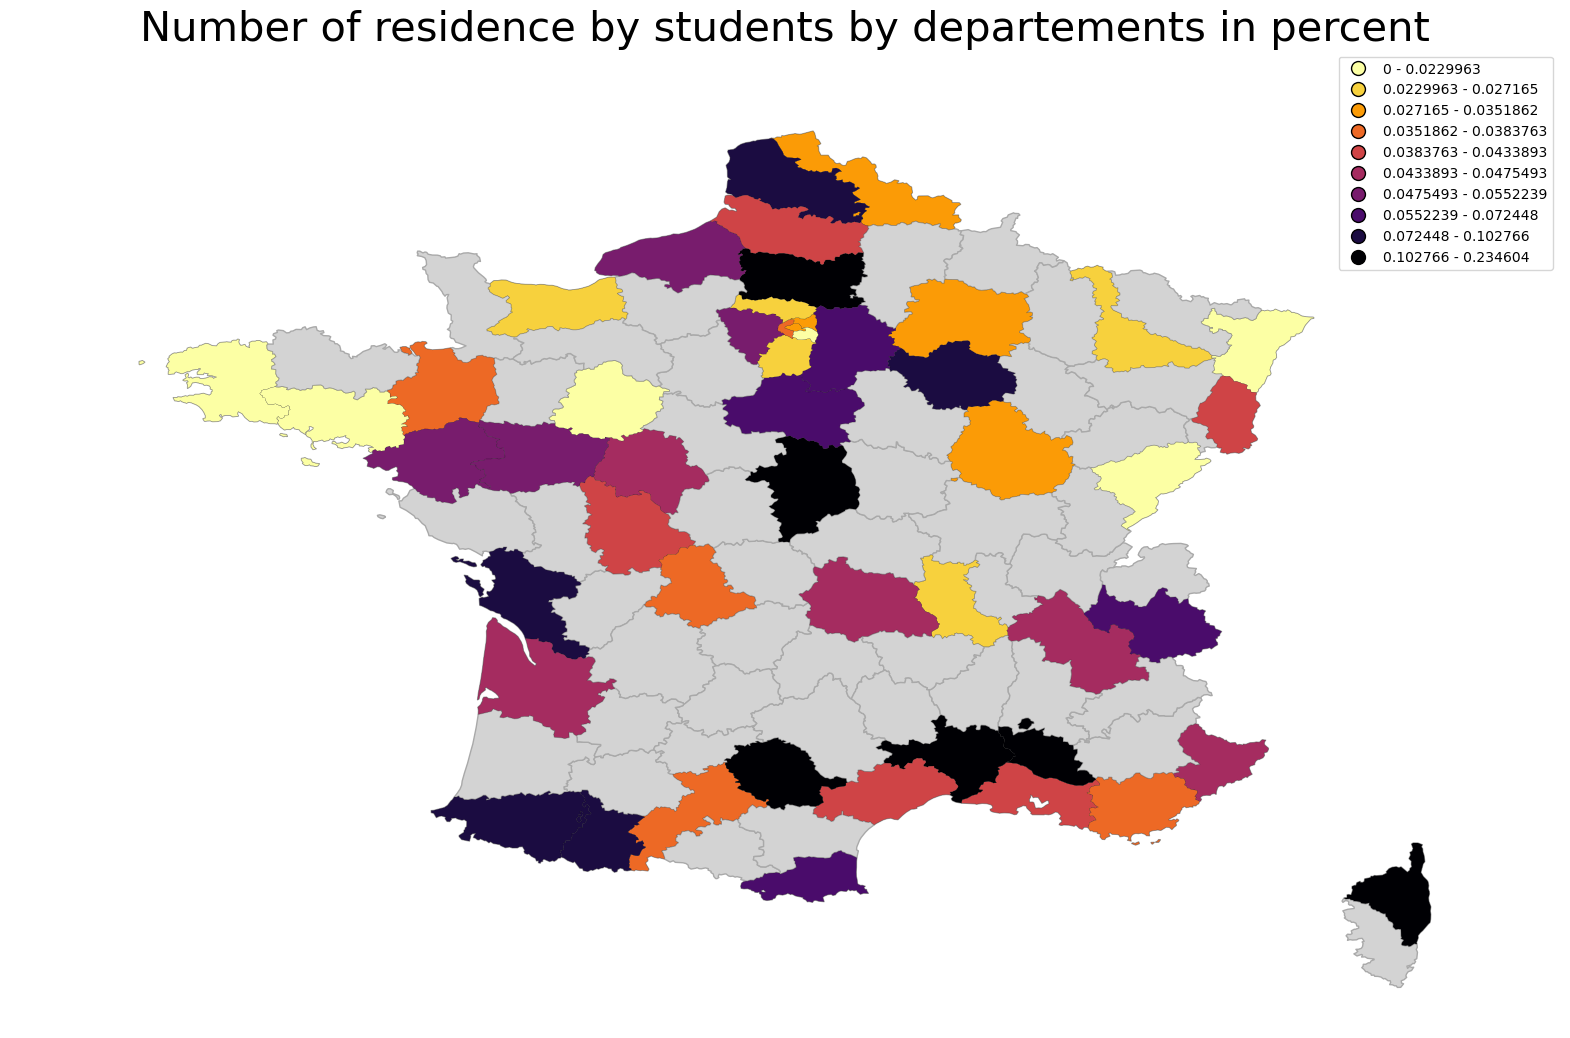

In [33]:

fig, ax = plt.subplots(figsize=(20, 18))
France.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey') #on affiche toute la France ainsi on n'a pas uniquement les départements ayant des Crous

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(nb_residence_par_eleves['Nb_by_students'], k=10) #on calcule 7 quantiles du nombre d'étudiants par résidences

# Map
maps = gplt.choropleth(fullData[(fullData["level_0"] != "Guyane") & (fullData["level_0"] != "La Réunion") &
                                        (fullData["level_0"] !="Martinique") & (fullData["level_0"] !="Guadeloupe")], 
    hue= "Nb_by_students" , 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
                
);

ax.set_title('Number of residence by students by departements in percent', fontsize=30)

**Lecture** : un département jaune signifie qu'il y a ratio assez faible entre le nombre de résidences et le nombre d'étudiants dans le département (entre 0 et 0.02%). 

## II.2 Existent-ils des disparités entre les résidences Crous par département ? 

### II.2.A. Statistiques générales des résidences Crous

In [34]:
df_stats = df[['Min Loyer', 'Max Loyer', 'Min Surface', 'Max Surface', 'prix_par_m2_surf_min', 'prix_par_m2_surf_max']]
df_stats.describe()

,Min Loyer,Max Loyer,Min Surface,Max Surface,prix_par_m2_surf_min,prix_par_m2_surf_max
count,489.000000,489.000000,510.000000,510.000000,382.000000,382.000000
mean,316.120736,415.986585,17.414275,28.302804,20.086438,17.234800
std,74.792539,112.249823,6.610159,15.183576,5.861121,6.235839
min,146.000000,146.000000,9.000000,9.000000,3.522727,3.522727
25%,258.360000,350.000000,15.000000,18.000000,16.530357,13.048234
50%,317.440000,404.000000,18.000000,25.000000,19.571336,17.509259
75%,362.000000,467.000000,19.000000,33.000000,23.224412,20.418863
max,635.000000,823.000000,88.000000,99.000000,68.777778,53.826087


### II.2.B. Disparités en termes de surface entre les résidences Crous entre département 

Text(0.5, 1.0, 'Répartition des surfaces des logements dans les résidences Crous par département')

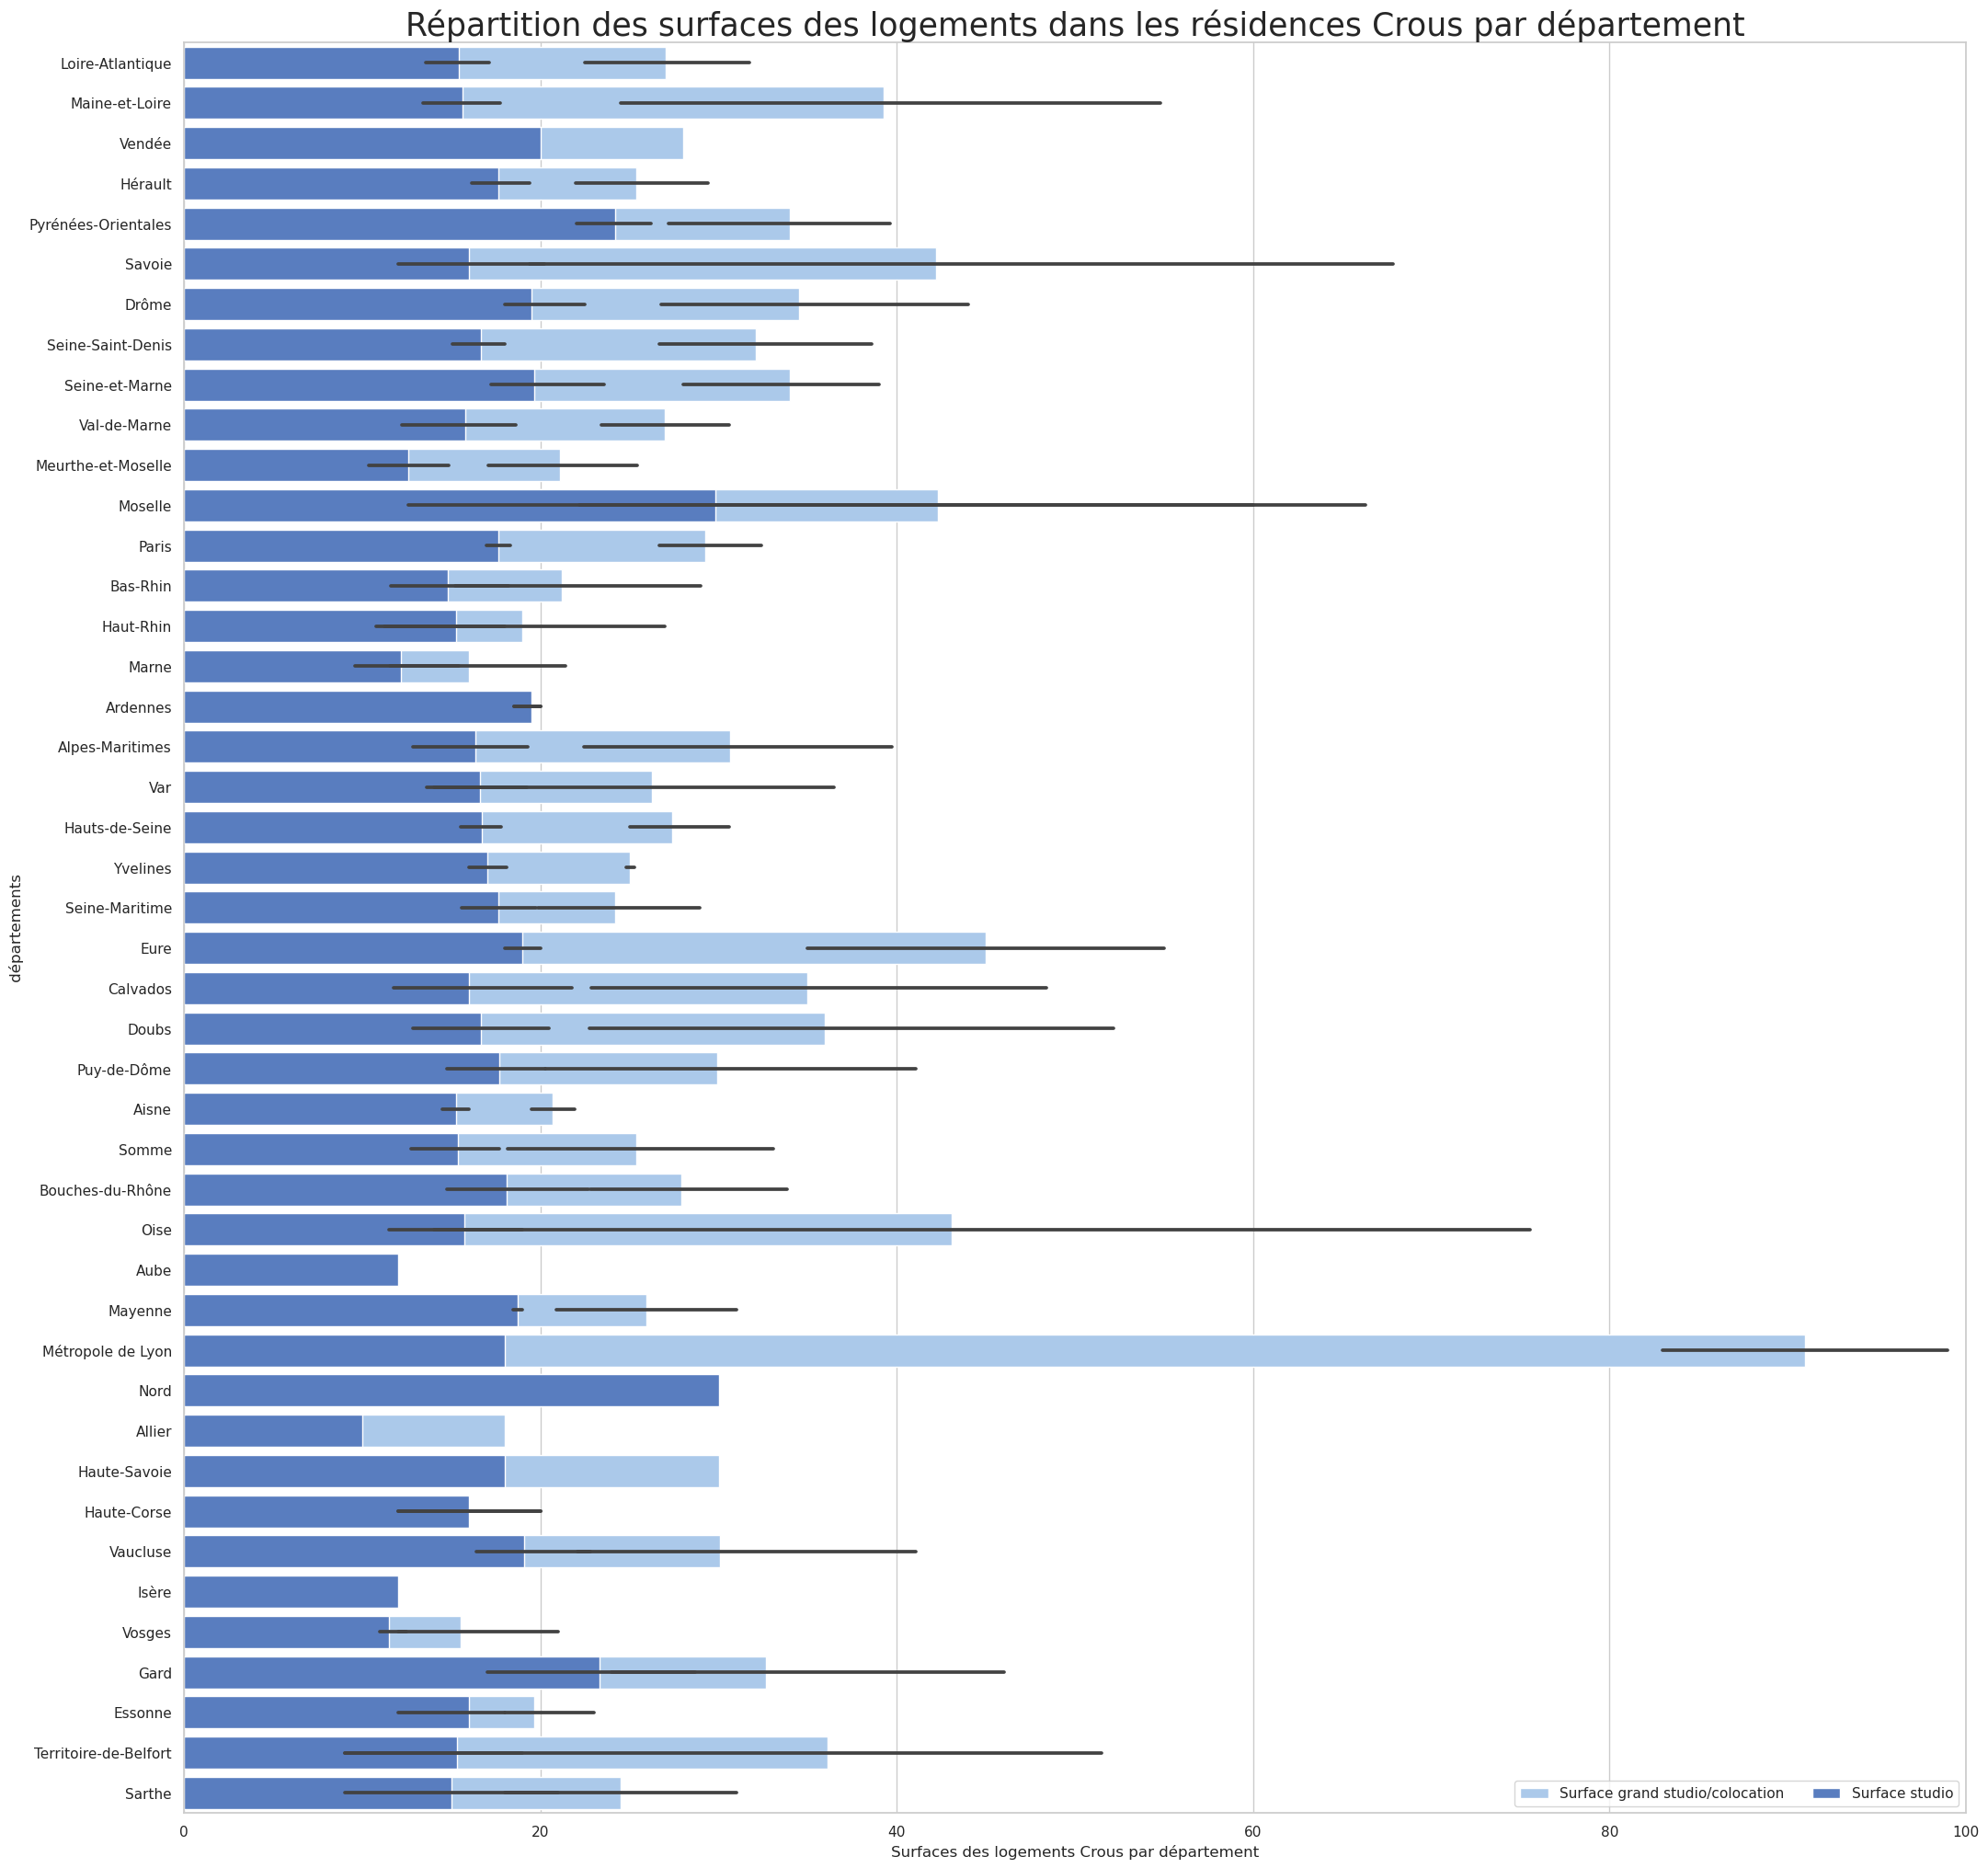

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Load the example car crash dataset
surfaces = df.dropna()

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="departement", x="Max Surface", data=surfaces,
            label="Surface grand studio/colocation", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(y="departement", x="Min Surface", data=surfaces,
            label="Surface studio", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel=" départements ",
       xlabel="Surfaces des logements Crous par département")
plt.title("Répartition des surfaces des logements dans les résidences Crous par département", size = 25) 
#sns.despine(left=True, bottom=True)

### II.2.C Disparité du prix du loyer au m2 entre les résidences Crous par département et comparaison avec le privé

Comparaison du prix des loyers au m2 des résidences Crous par département. Utilisation d'un indicateur de prix au m2 pour prendre en considération les différences en termes de surface des logements proposés par les résidences Crous entre département. Comparaison avec le privé également. 

/tmp/ipykernel_806/3614263153.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ordered_df = df.dropna().groupby("departement").mean().sort_values(by='prix_par_m2_surf_max')


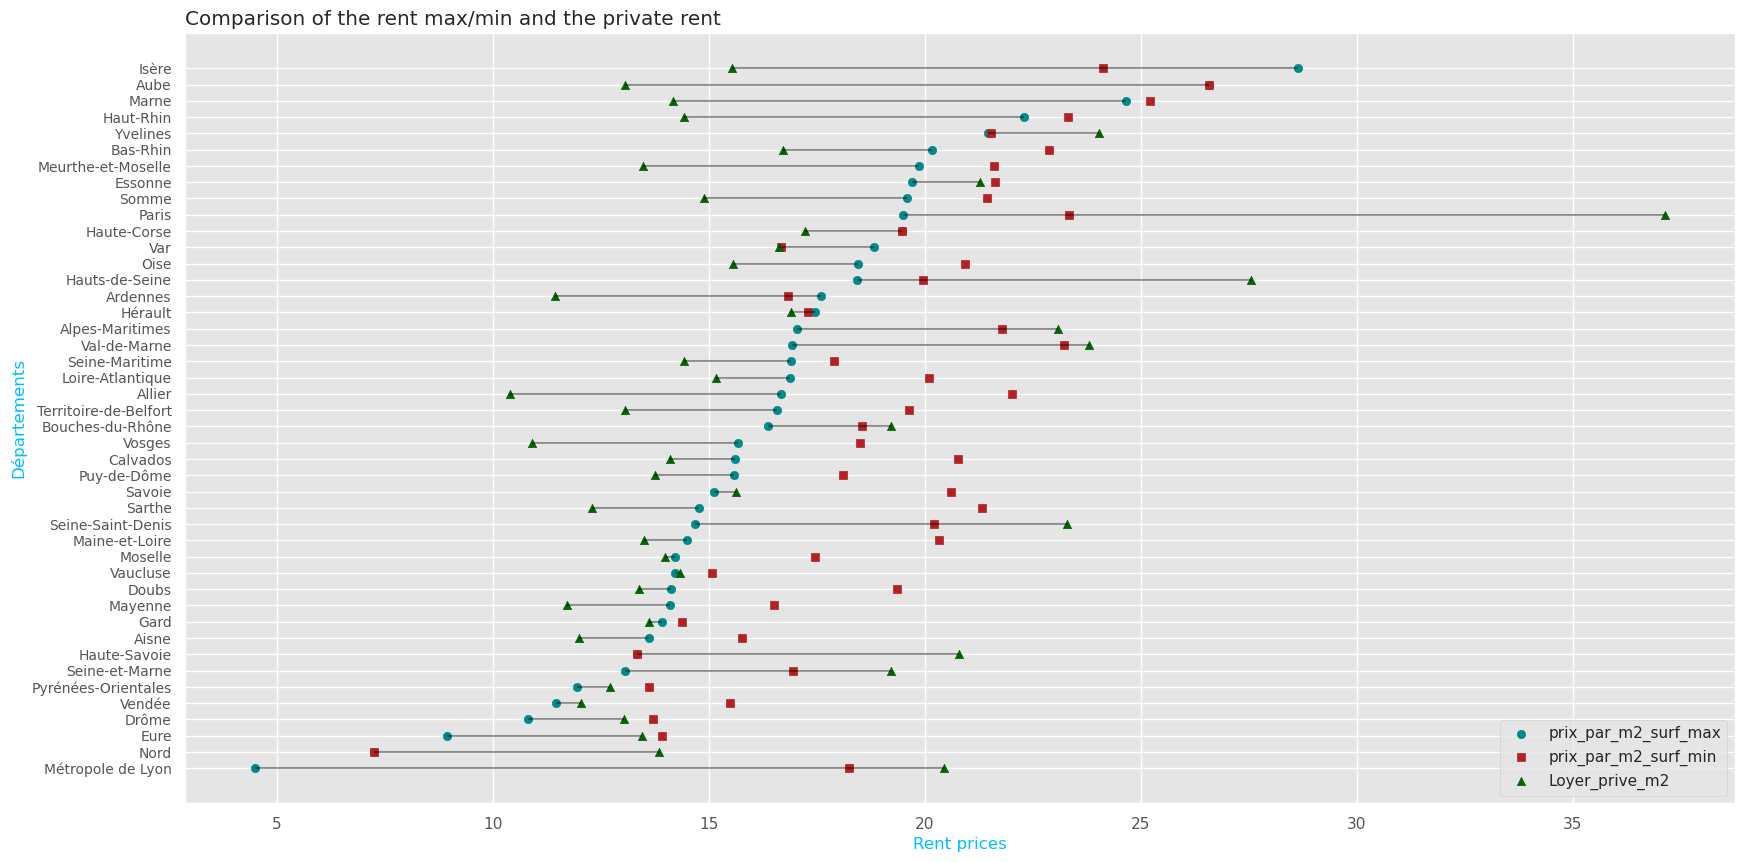

In [92]:
fig, ax = plt.subplots(figsize=(20, 10))
# Reorder it following the values of the first value:

ordered_df = df.dropna().groupby("departement").mean().sort_values(by='prix_par_m2_surf_max')
my_range=ordered_df.index
 
# The horizontal plot is made using the hline function
plt.hlines(y= my_range, xmin=ordered_df['prix_par_m2_surf_max'], xmax=ordered_df['Loyer_prive_m2'], color='black', alpha=0.4)
plt.scatter(ordered_df['prix_par_m2_surf_max'], my_range, color='darkcyan', alpha=1, marker = 'o', label='prix_par_m2_surf_max')
plt.scatter(ordered_df['prix_par_m2_surf_min'], my_range, color='firebrick', alpha=1,  marker = 's', label='prix_par_m2_surf_min')
plt.scatter(ordered_df['Loyer_prive_m2'], my_range, color='darkgreen', alpha=1 ,marker = '^', label='Loyer_prive_m2')
plt.legend()

    
# Add title and axis names
plt.yticks(my_range, ordered_df.index, fontsize= 10)
plt.title("Comparison of the rent max/min and the private rent", loc='left')
plt.xlabel('Rent prices', color = 'deepskyblue')
plt.ylabel('Départements', color = 'deepskyblue')
ax.legend(loc = 4, bbox_to_anchor = (1,0))
plt.style.use("ggplot")


# Show the graph
plt.show()

Même graphique en enlevant les départements avec un nombre trop important de valeurs manquantes 

/tmp/ipykernel_806/3140488430.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ordered_df = df_dep_ratio .dropna().groupby("departement").mean().sort_values(by='prix_par_m2_surf_max')


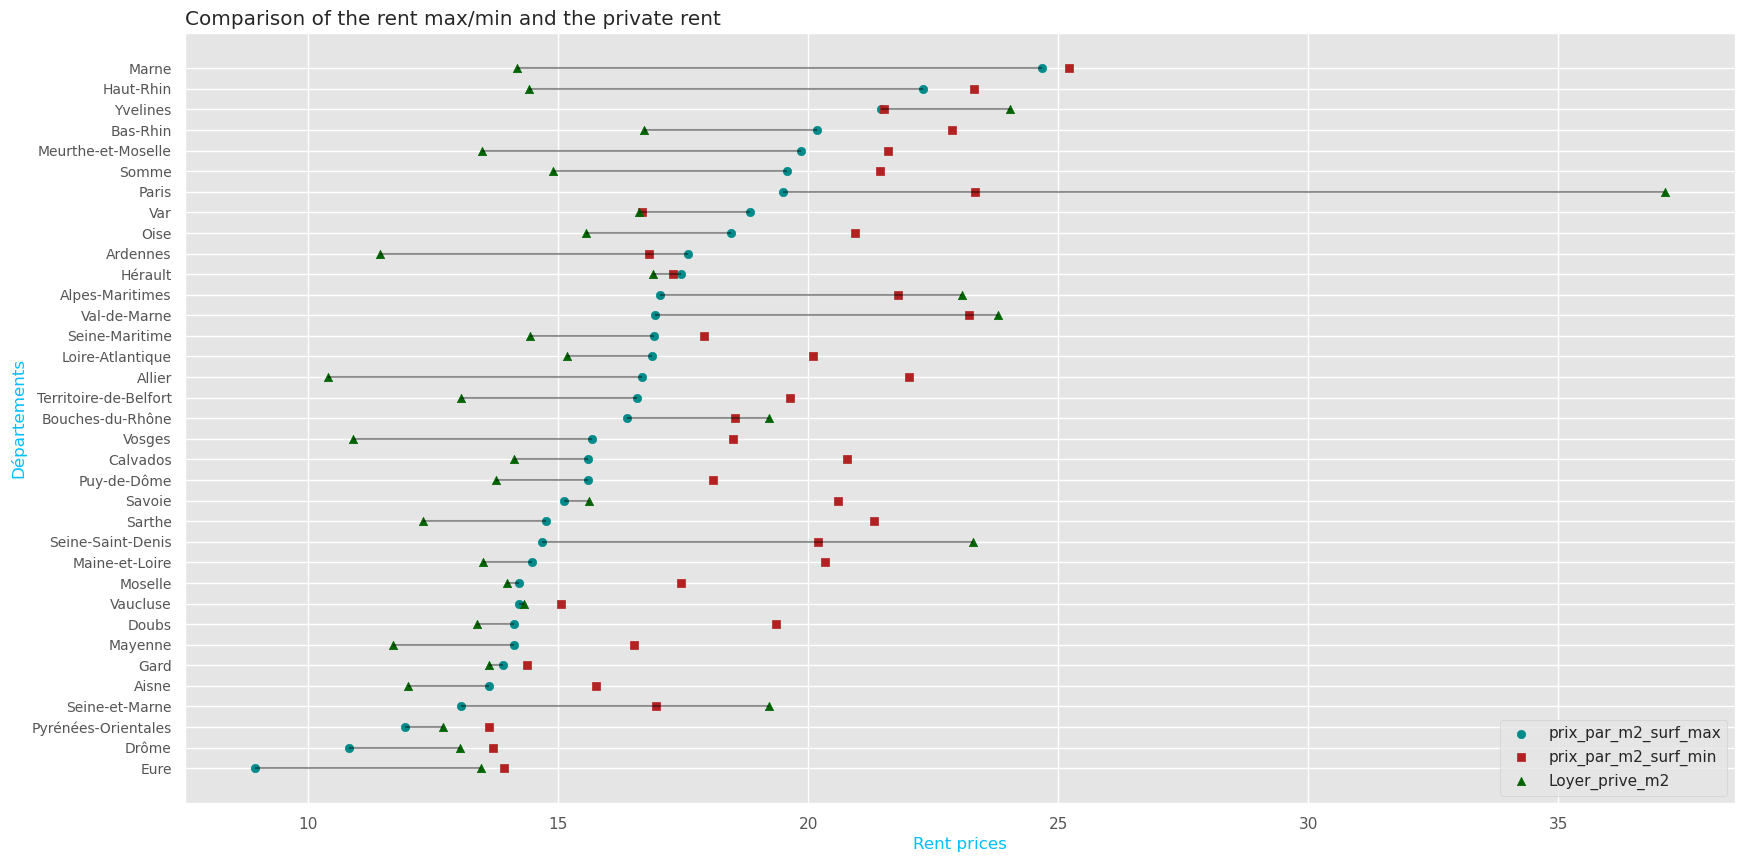

In [91]:
fig, ax = plt.subplots(figsize=(20, 10))
# Reorder it following the values of the first value:

ordered_df = df_dep_ratio .dropna().groupby("departement").mean().sort_values(by='prix_par_m2_surf_max')
my_range=ordered_df.index
 
# The horizontal plot is made using the hline function
plt.hlines(y= my_range, xmin=ordered_df['prix_par_m2_surf_max'], xmax=ordered_df['Loyer_prive_m2'], color='black', alpha=0.4)
plt.scatter(ordered_df['prix_par_m2_surf_max'], my_range, color='darkcyan', alpha=1, marker = 'o', label='prix_par_m2_surf_max')
plt.scatter(ordered_df['prix_par_m2_surf_min'], my_range, color='firebrick', alpha=1,  marker = 's', label='prix_par_m2_surf_min')
plt.scatter(ordered_df['Loyer_prive_m2'], my_range, color='darkgreen', alpha=1 ,marker = '^', label='Loyer_prive_m2')
plt.legend()

    
# Add title and axis names
plt.yticks(my_range, ordered_df.index, fontsize= 10)
plt.title("Comparison of the rent max/min and the private rent", loc='left')
plt.xlabel('Rent prices', color = 'deepskyblue')
plt.ylabel('Départements', color = 'deepskyblue')
ax.legend(loc = 4, bbox_to_anchor = (1,0))
plt.style.use("ggplot")


# Show the graph
plt.show()

## II.3 Répartition des étudiants et des résidences Crous 

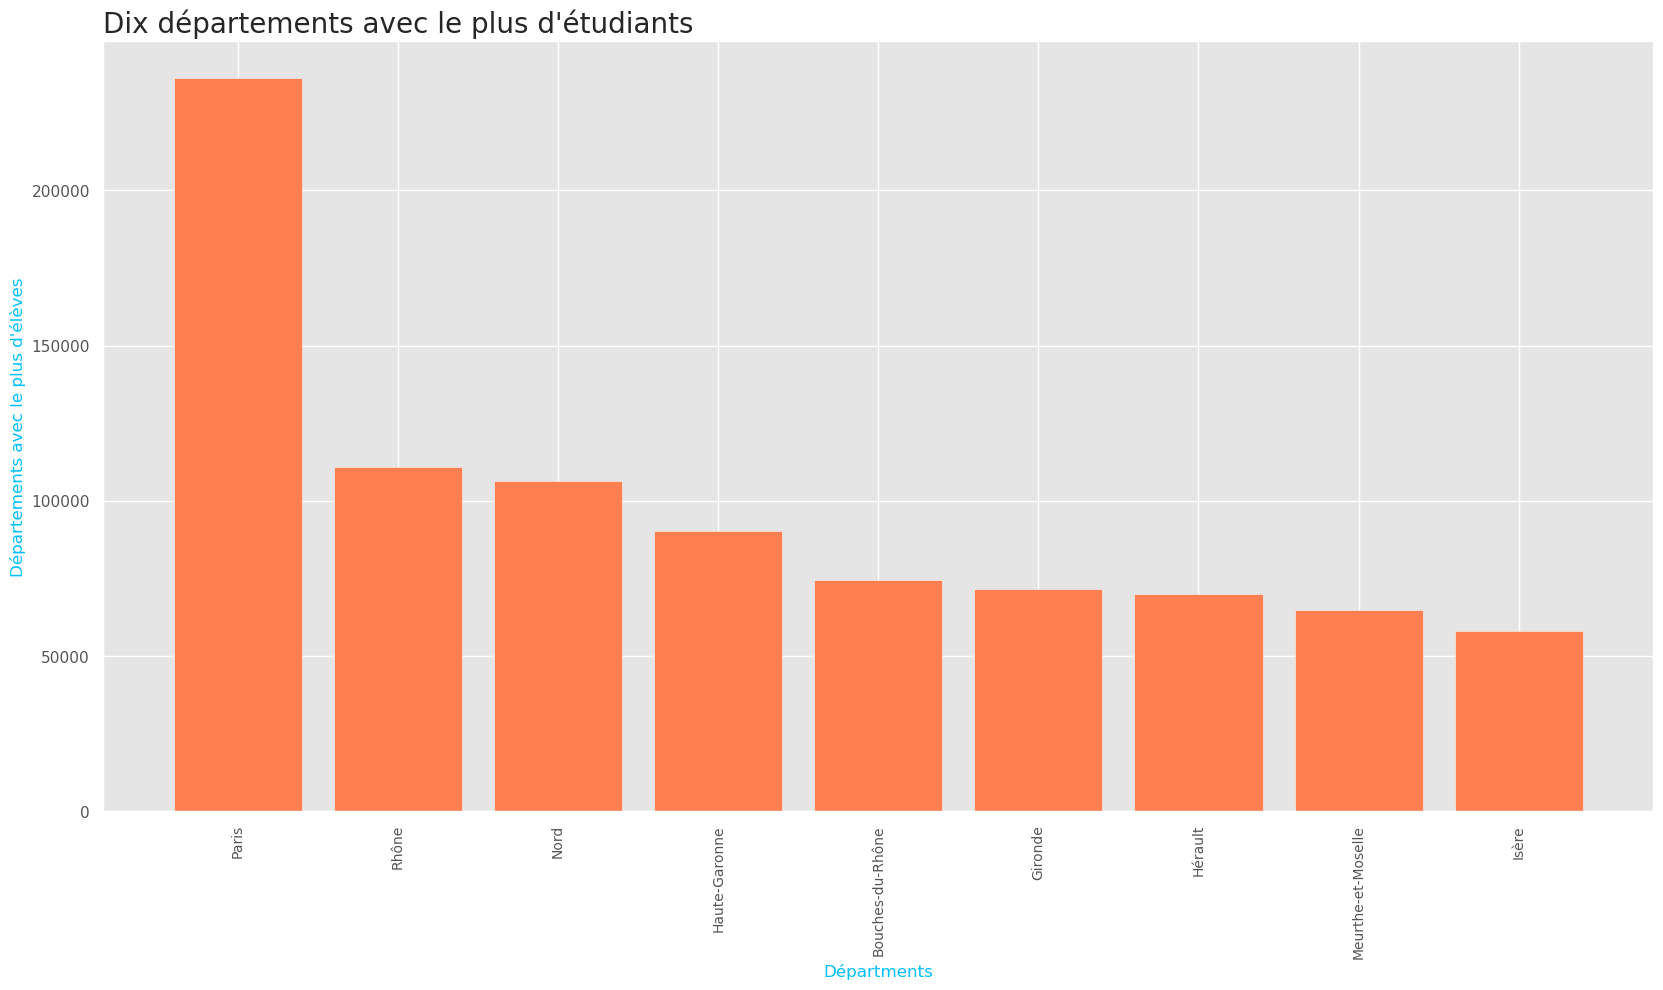

In [90]:
nb_eleve_dep_top_10 = nb_eleve_dep_top_10.loc[(nb_eleve_dep_top_10['effectif_sans_cpge']>56740)] 
departments = nb_eleve_dep_top_10.index
Nb_élèves = nb_eleve_dep_top_10['effectif_sans_cpge']

fig, ax = plt.subplots(figsize=(20, 10)) #taille adéquate 

plt.bar(departments, Nb_élèves, color ='coral' )
plt.xticks(departments, rotation = 'vertical', size =10)
plt.title("Dix départements avec le plus d'étudiants", loc='left', size=20)
plt.xlabel('Départments', color = 'deepskyblue') 
plt.ylabel("Départements avec le plus d'élèves", color = 'deepskyblue')
plt.style.use("ggplot") #à utiliser pour améliorer le style 
plt.show()

In [58]:
Nb_residence_par_dep

,index
departement,
Ain,1
Aisne,2
Allier,1
Alpes-Maritimes,15
Ardennes,4
...,...
Vendée,2
Vienne,13
Vosges,4


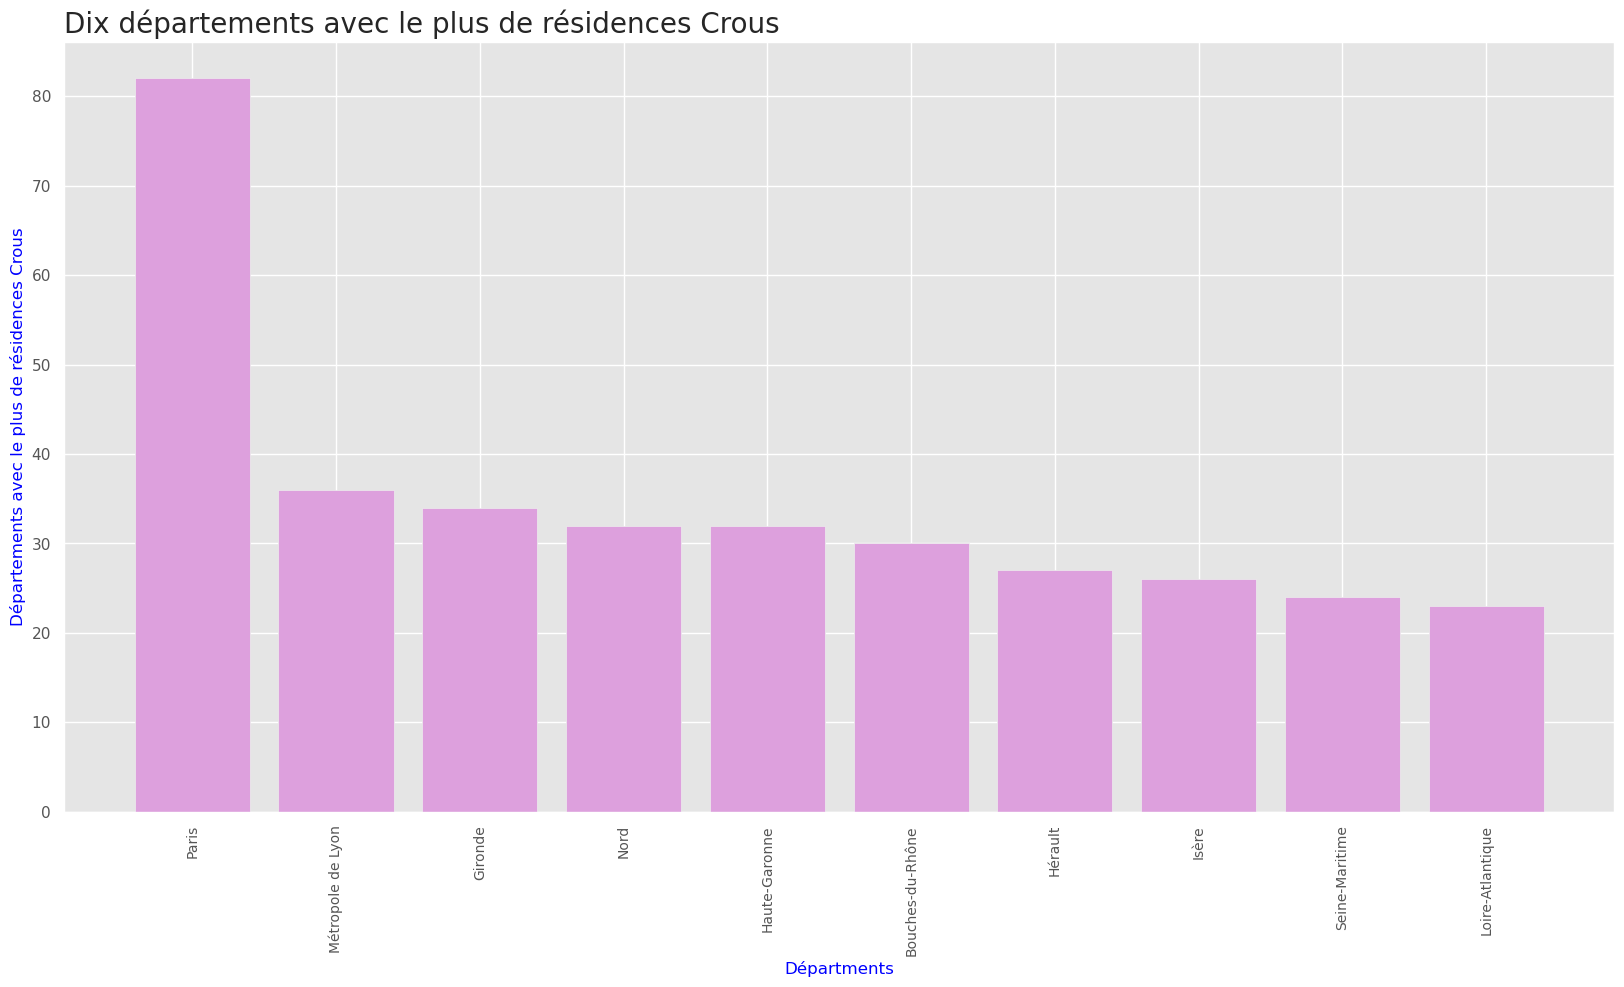

In [88]:
nb_res_dep_top_10 = Nb_residence_par_dep.sort_values(by='index', ascending=False) 
nb_res_dep_top_10.head(10)

nb_res_dep_top_10 = nb_res_dep_top_10.loc[(nb_res_dep_top_10['index']>=23)] 
departments = nb_res_dep_top_10.index
Nb_res = nb_res_dep_top_10['index']

fig, ax = plt.subplots(figsize=(20, 10)) #taille adéquate 

plt.bar(departments, Nb_res, color ='plum')
plt.xticks(departments, rotation = 'vertical', size =10)
plt.title("Dix départements avec le plus de résidences Crous", loc='left', size=20)
plt.xlabel('Départments', color ='blue') 
plt.ylabel("Départements avec le plus de résidences Crous", color ='blue')
plt.style.use("ggplot")
plt.show()